# Task 1: Exploratory Data Analysis (EDA)

### 1. Load Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load the Datasets

In [17]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Preview datasets
print("Customers Dataset:")
print(customers.head())
print("\nProducts Dataset:")
print(products.head())
print("\nTransactions Dataset:")
print(transactions.head())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

### 3. Data Inspection

In [18]:
# Inspect structure and basic info
print(customers.info())
print(products.info())
print(transactions.info())

# Check for missing values
print("Missing values in Customers:\n", customers.isnull().sum())
print("Missing values in Products:\n", products.isnull().sum())
print("Missing values in Transactions:\n", transactions.isnull().sum())

# Check for duplicates
print("Duplicate rows in Customers:", customers.duplicated().sum())
print("Duplicate rows in Products:", products.duplicated().sum())
print("Duplicate rows in Transactions:", transactions.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

### 4. Merge Datasets

In [19]:
# Merge Transactions with Customers
merged_data = pd.merge(transactions, customers, on='CustomerID')

# Merge with Products
merged_data = pd.merge(merged_data, products, on='ProductID')

# Preview the merged dataset
print("Merged Dataset:")
print(merged_data.head())

Merged Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving B

### 5. Exploratory Data Analysis 

#### A. General Statistics

In [20]:
# Summary statistics
print(merged_data.describe())

# Unique values in key columns
print("Unique Regions:", merged_data['Region'].unique())
print("Unique Categories:", merged_data['Category'].unique())

          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000
Unique Regions: ['Europe' 'Asia' 'South America' 'North America']
Unique Categories: ['Electronics' 'Home Decor' 'Books' 'Clothing']


#### B. Customer Analysis

Customer Counts by Region:
 South America    304
North America    244
Europe           234
Asia             218
Name: Region, dtype: int64


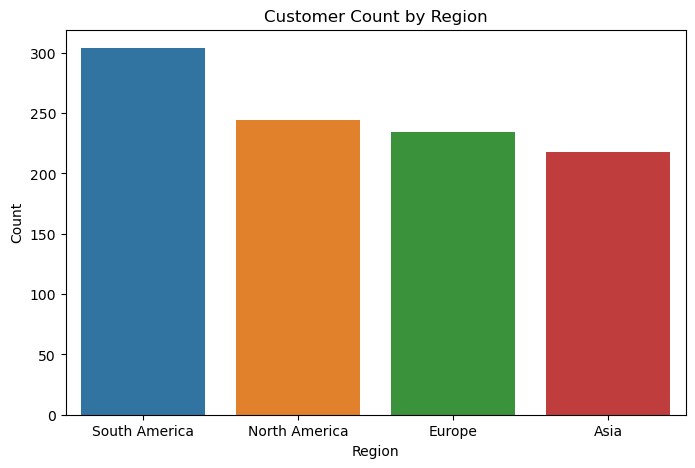

In [21]:
# Region-wise customer count
region_counts = merged_data['Region'].value_counts()
print("Customer Counts by Region:\n", region_counts)

# Plot region distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title("Customer Count by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

#### C. Product Analysis 

Product Counts by Category:
 Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: Category, dtype: int64


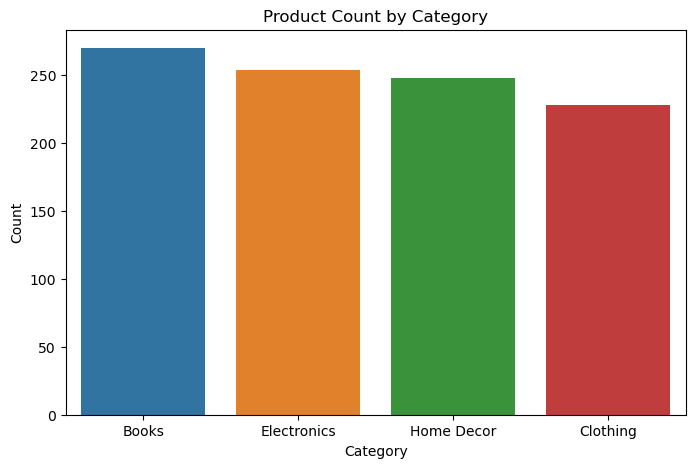

In [22]:
# Product category popularity
category_counts = merged_data['Category'].value_counts()
print("Product Counts by Category:\n", category_counts)

# Plot category distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title("Product Count by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

#### D. Transaction Analysis 

Monthly Revenue:
 Month
1     66376.39
2     51459.27
3     47828.73
4     57519.06
5     64527.74
6     48771.18
7     71366.39
8     63436.74
9     70603.75
10    47063.22
11    38224.37
12    62818.72
Name: TotalValue, dtype: float64


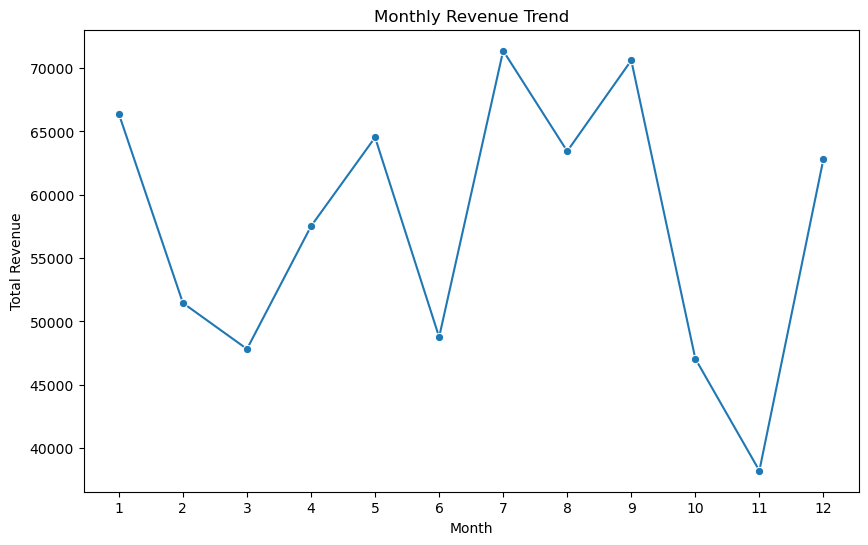

In [23]:
# Total revenue by month
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['Month'] = merged_data['TransactionDate'].dt.month

monthly_revenue = merged_data.groupby('Month')['TotalValue'].sum()
print("Monthly Revenue:\n", monthly_revenue)

# Plot revenue trends
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(range(1, 13))
plt.show()

### 6. Derive Business Insights


#### A. Customer Spending Analysis

         TotalSpent  TransactionCount
count    199.000000        199.000000
mean    3467.314372          5.025126
std     1832.677958          2.198340
min       82.360000          1.000000
25%     2162.040000          3.000000
50%     3137.660000          5.000000
75%     4770.225000          6.000000
max    10673.870000         11.000000


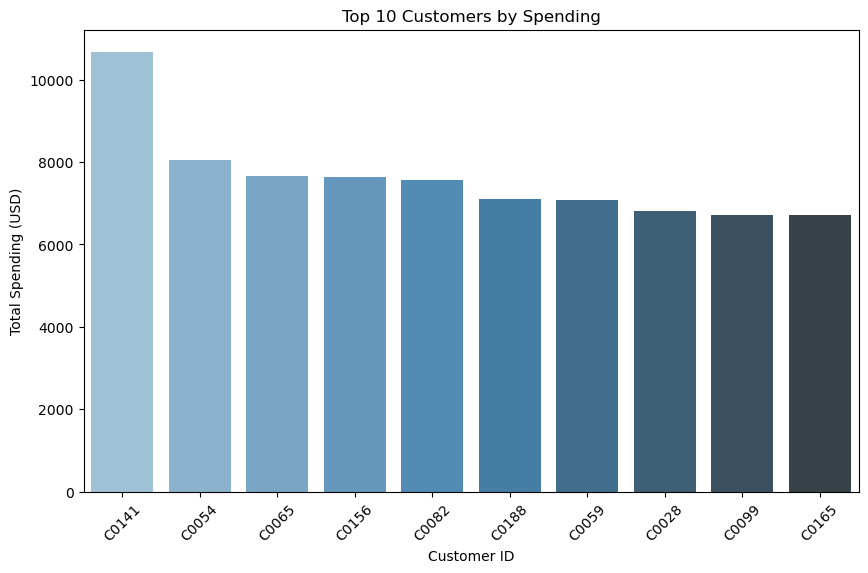

In [24]:
# Average spending per customer
customer_spending = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count'
}).rename(columns={'TotalValue': 'TotalSpent', 'TransactionID': 'TransactionCount'})

print(customer_spending.describe())

# Plot top 10 customers by spending
top_customers = customer_spending.sort_values(by='TotalSpent', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index, y=top_customers['TotalSpent'], palette='Blues_d')
plt.title("Top 10 Customers by Spending")
plt.xlabel("Customer ID")
plt.ylabel("Total Spending (USD)")
plt.xticks(rotation=45)
plt.show()

#### B. Product Revenue Contribution

Top 5 Revenue-Generating Products:
 ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


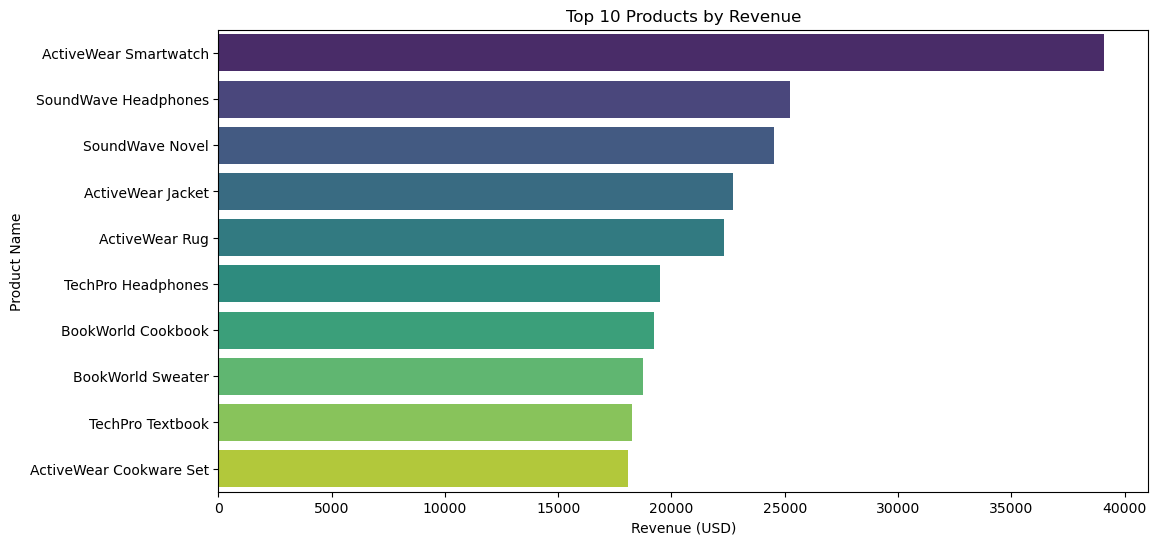

In [25]:
# Total revenue by product
product_revenue = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)
print("Top 5 Revenue-Generating Products:\n", product_revenue.head())

# Plot top 10 products by revenue
top_products = product_revenue.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue (USD)")
plt.ylabel("Product Name")
plt.show()

#### C. Customer Signup Analysis

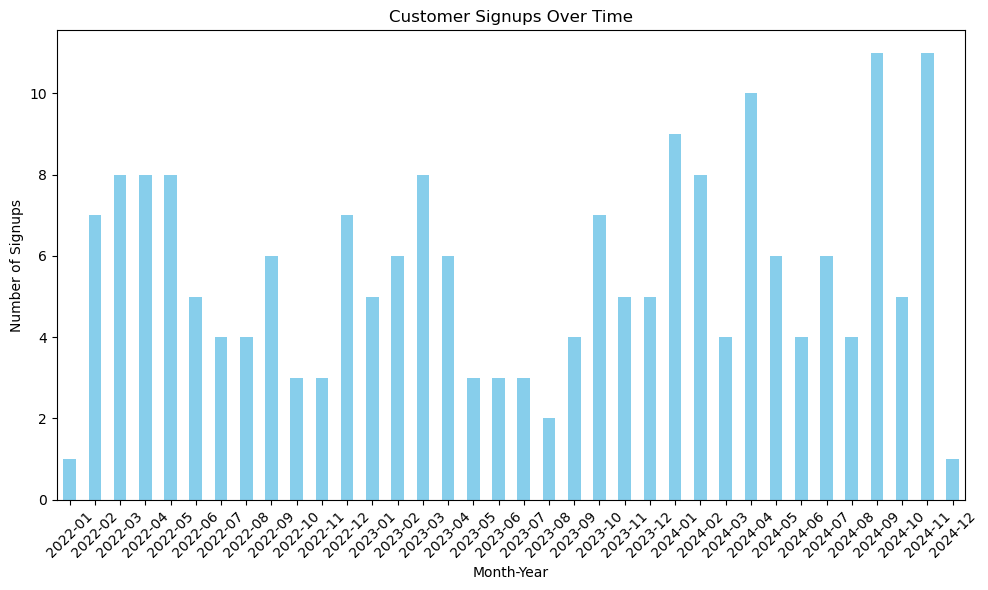

In [26]:
# Convert SignupDate to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Monthly customer signups
signup_trends = customers.groupby(customers['SignupDate'].dt.to_period('M')).size()

# Plot signup trends
plt.figure(figsize=(10, 6))
signup_trends.plot(kind='bar', color='skyblue')
plt.title("Customer Signups Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Number of Signups")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### D. Regional Revenue Analysis

Revenue by Region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


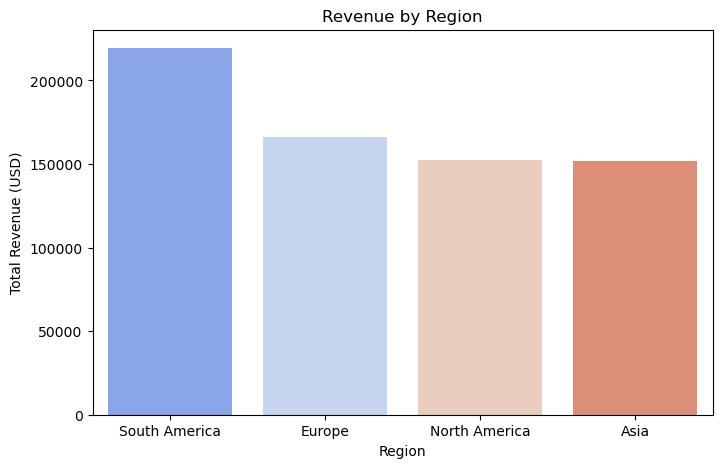

In [27]:
# Revenue by region
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Revenue by Region:\n", region_revenue)

# Plot revenue by region
plt.figure(figsize=(8, 5))
sns.barplot(x=region_revenue.index, y=region_revenue.values, palette='coolwarm')
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue (USD)")
plt.show()

#### E. Time of Transaction Analysis

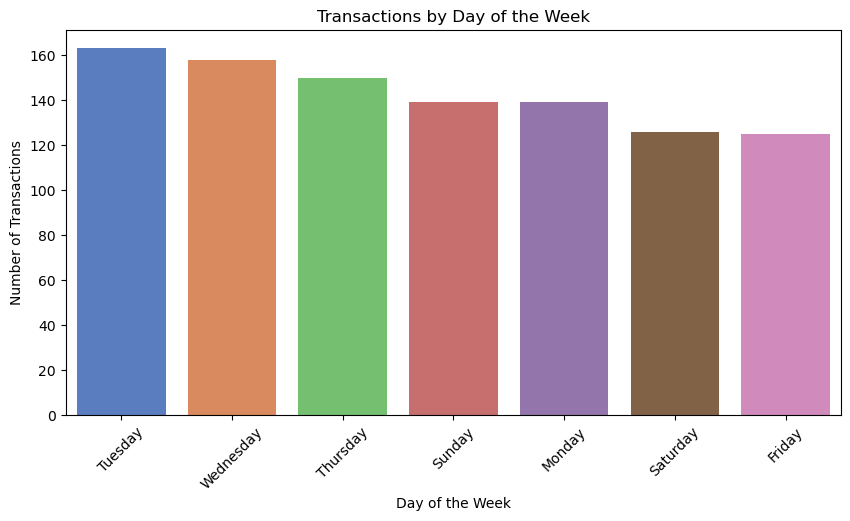

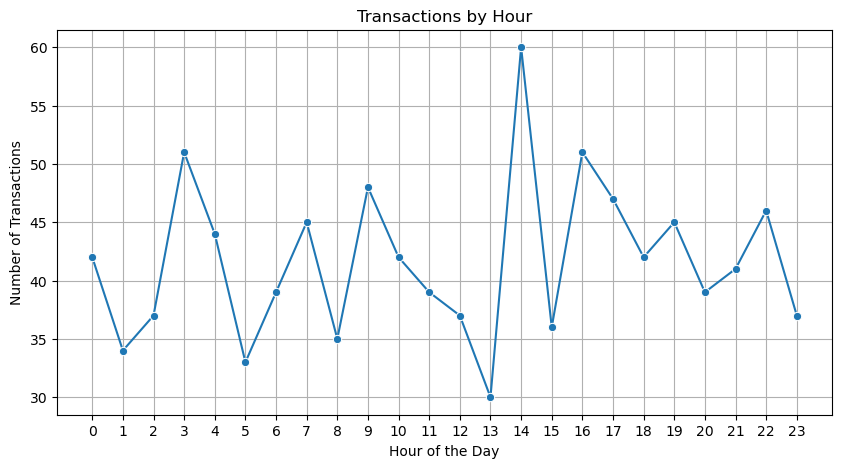

In [28]:
# Extract time-related features
merged_data['DayOfWeek'] = merged_data['TransactionDate'].dt.day_name()
merged_data['Hour'] = merged_data['TransactionDate'].dt.hour

# Transactions by day of the week
daywise_transactions = merged_data['DayOfWeek'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=daywise_transactions.index, y=daywise_transactions.values, palette='muted')
plt.title("Transactions by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()

# Transactions by hour
hourly_transactions = merged_data['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_transactions.index, y=hourly_transactions.values, marker='o')
plt.title("Transactions by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Transactions")
plt.xticks(range(0, 24))
plt.grid()
plt.show()